In [1]:
import os
import numpy as np 
import pandas as pd
import arcpy
from arcpy import env

In [2]:
result_path = r"F:\cache_data\pre_soiltype_table\dy\autogluon\predict_csv\prediction_soiltype_tz_CatBoost_20240226.csv"

In [3]:
# 读取预测结果
data = pd.read_csv(result_path,index_col=False)

In [4]:
stander_path = r"D:\ArcGISProjects\workspace\shbyq\feature_raster_file\features_data_dy.gdb\DEM"

In [5]:
data.columns

Index(['prediction_0', 'prediction_1', 'prediction_2', 'prediction_3',
       'prediction_4', 'prediction_5', 'prediction_6', 'prediction_7',
       'prediction_8', 'prediction_9',
       ...
       'prediction_334', 'prediction_335', 'prediction_336', 'prediction_337',
       'prediction_338', 'prediction_339', 'prediction_340', 'prediction_341',
       'prediction_342', 'prediction_343'],
      dtype='object', length=344)

In [6]:
# 合并除第一列外的所有列到第一列
frames = []
for col in data.columns:
    frames.append(data[col])

# 合并 DataFrame
merged_data = pd.concat(frames, axis=0, ignore_index=True)

In [8]:
merged_data.dropna(inplace=True)

In [9]:
merged_data.size

171871183

In [10]:
merged_data.value_counts()

59.0    30036545
54.0    23735134
53.0    22623019
8.0     18338238
76.0    14998903
61.0    10648807
46.0     9592492
11.0     5510245
78.0     4645875
6.0      4094467
48.0     3433945
25.0     3188020
52.0     2689469
60.0     2348141
43.0     2167793
79.0     1948010
12.0     1868396
57.0     1635479
42.0     1513902
63.0     1304187
65.0      788258
56.0      491956
29.0      474232
80.0      443703
75.0      441969
50.0      376923
74.0      368142
14.0      367084
49.0      363920
9.0       343015
21.0      193335
27.0      173723
47.0      137666
15.0      129601
45.0       67075
28.0       66402
41.0       59612
40.0       39737
26.0       38441
55.0       23997
35.0       23062
64.0       22619
22.0       22152
1.0        21041
13.0       18534
82.0       18126
17.0       15983
10.0       10457
20.0        9351
dtype: int64

In [20]:

# def label_array(mixed_array):
#     # 获取唯一的值
#     unique_values = list(set(merged_data.values))

#     # 创建一个字典来映射唯一值到标签
#     label_mapping = {value: index for index, value in enumerate(unique_values)}

#     # 使用字典映射函数将数组标签化
#     labeled_array = np.vectorize(label_mapping.get)(mixed_array)
#     return labeled_array,label_mapping
# # 标签化array
# cach_result = label_array(merged_data)

In [10]:
type(merged_data)

pandas.core.series.Series

In [11]:
dem_array = arcpy.RasterToNumPyArray(stander_path)
dem_array.shape

(12881, 13343)

In [12]:
dem_array.shape[0] * dem_array.shape[1]

171871183

In [13]:
raster_array = np.reshape(merged_data.values,dem_array.shape)

In [14]:
raster_array = raster_array.astype(np.float32)

In [15]:
dem_array.dtype,raster_array.dtype

(dtype('float32'), dtype('float32'))

In [16]:
env.workspace = r"D:\ArcGISProjects\workspace\shbyq\feature_soiltype_result\feature_soiltype_result_dy.gdb"
env.extent = stander_path

In [17]:
# 掩膜提取
def mask_raster(array,mask_ele,cell_size):
    out_raster = arcpy.NumPyArrayToRaster(
    array,
    arcpy.Point(arcpy.env.extent.XMin, arcpy.env.extent.YMin),
    cell_size,
    cell_size,
)
    """按掩膜提取栅格,空间参考设定为:CGCS2000_3_Degree_GK_CM_108E"""
    output_coordinate_system = arcpy.Describe(mask_ele).spatialReference
    with arcpy.EnvManager(outputCoordinateSystem=output_coordinate_system,snapRaster=mask_ele, cellSize=mask_ele):
        result_raster = arcpy.sa.ExtractByMask(out_raster, mask_ele, "INSIDE")
        return result_raster

In [18]:
# 按掩膜处理
result_raster = mask_raster(raster_array,stander_path, 5)
# result_raster.save("prediction_sioltype_CATB_20240226")
print("完成")

完成


In [19]:
# 按掩膜分割
# 按掩膜提取
def mask_extraction(in_raster,mask_ele,pro_ele):
    ele_pro = arcpy.Describe(pro_ele).spatialReference
    with arcpy.EnvManager(outputCoordinateSystem=ele_pro,snapRaster=pro_ele, cellSize=5):
        out_raster = arcpy.sa.ExtractByMask(in_raster, mask_ele, "INSIDE", ele_pro)
        return out_raster
mask_ele = r"D:\ArcGISProjects\workspace\shbyq\features_data_vector.gdb\extent\DY_500"
clip_raster = mask_extraction(result_raster,mask_ele,result_raster)
clip_raster.save("prediction_sioltype_CATB_20240226")

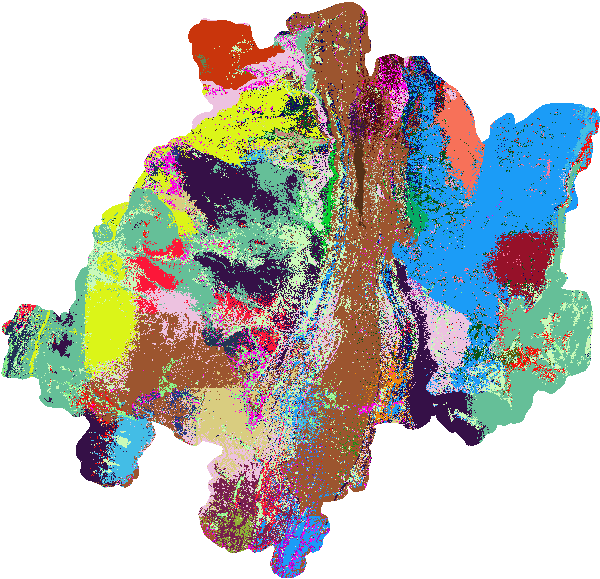

In [20]:
arcpy.sa.Int(clip_raster)

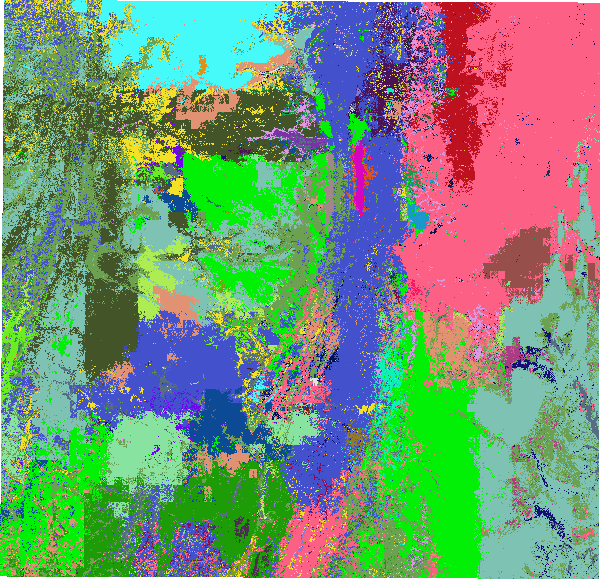

In [17]:
arcpy.sa.Int(result_raster)

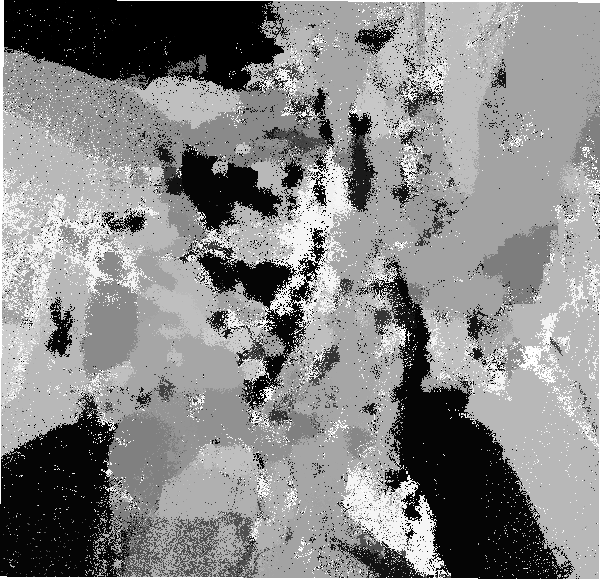

In [37]:
result_raster

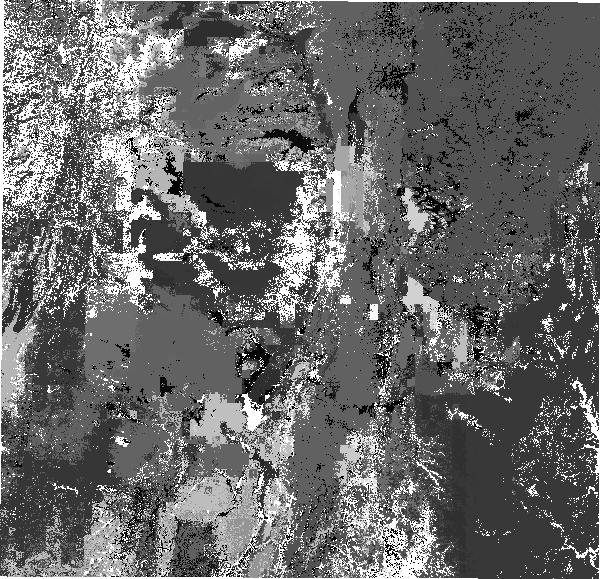

In [18]:
result_raster

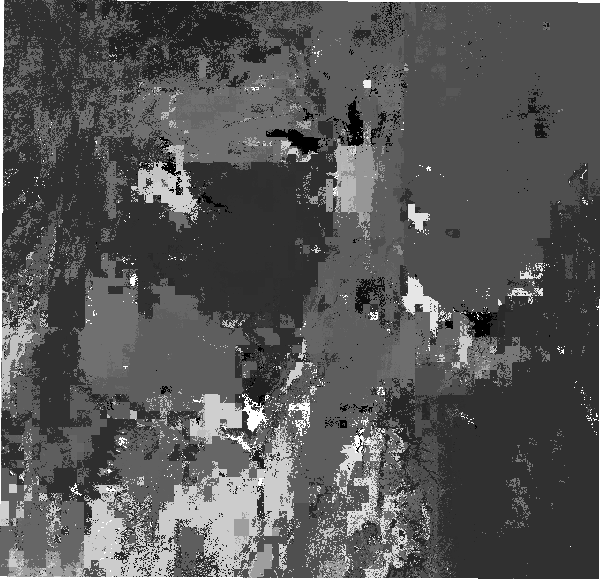

In [19]:
result_raster